In [43]:
# Import libraries
import numpy as np
import pandas as pd
from obspy import read
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import os

In [44]:
cat_directory = './data/lunar/training/catalogs/'
cat_file = cat_directory + 'apollo12_catalog_GradeA_final.csv'
cat = pd.read_csv(cat_file)
cat

,filename,time_abs(%Y-%m-%dT%H:%M:%S.%f),time_rel(sec),evid,mq_type
0,xa.s12.00.mhz.1970-01-19HR00_evid00002,1970-01-19T20:25:00.000000,73500.0,evid00002,impact_mq
1,xa.s12.00.mhz.1970-03-25HR00_evid00003,1970-03-25T03:32:00.000000,12720.0,evid00003,impact_mq
2,xa.s12.00.mhz.1970-03-26HR00_evid00004,1970-03-26T20:17:00.000000,73020.0,evid00004,impact_mq
3,xa.s12.00.mhz.1970-04-25HR00_evid00006,1970-04-25T01:14:00.000000,4440.0,evid00006,impact_mq
4,xa.s12.00.mhz.1970-04-26HR00_evid00007,1970-04-26T14:29:00.000000,52140.0,evid00007,deep_mq
...,...,...,...,...,...
71,xa.s12.00.mhz.1974-10-14HR00_evid00156,1974-10-14T17:43:00.000000,63780.0,evid00156,impact_mq
72,xa.s12.00.mhz.1975-04-12HR00_evid00191,1975-04-12T18:15:00.000000,65700.0,evid00191,impact_mq
73,xa.s12.00.mhz.1975-05-04HR00_evid00192,1975-05-04T10:05:00.000000,36300.0,evid00192,impact_mq
74,xa.s12.00.mhz.1975-06-24HR00_evid00196,1975-06-24T16:03:00.000000,57780.0,evid00196,impact_mq


In [45]:
row = cat.iloc[20]
arrival_time = datetime.strptime(row['time_abs(%Y-%m-%dT%H:%M:%S.%f)'],'%Y-%m-%dT%H:%M:%S.%f')
arrival_time

datetime.datetime(1971, 4, 13, 12, 55)

In [46]:
# If we want the value of relative time, we don't need to use datetime
arrival_time_rel = row['time_rel(sec)']
arrival_time_rel

46500.0

In [47]:
# Let's also get the name of the file
test_filename = row.filename
test_filename

'xa.s12.00.mhz.1971-04-13HR02_evid00029'

In [48]:
data_directory = './data/lunar/training/data/S12_GradeA/'
mseed_file = f'{data_directory}{test_filename}.mseed'
mseed_file = "./data/lunar/test/data/S12_GradeB/xa.s12.00.mhz.1970-03-14HR00_evid00018.mseed"
st = read(mseed_file)
st

1 Trace(s) in Stream:
XA.S12.00.MHZ | 1970-03-14T00:00:00.520000Z - 1970-03-15T00:00:03.840755Z | 6.6 Hz, 572423 samples

In [56]:
# This is how you get the data and the time, which is in seconds
tr = st.traces[0].copy()
tr_times = tr.times()
tr_data = tr.data

# Start time of trace (another way to get the relative arrival time using datetime)
starttime = tr.stats.starttime.datetime
arrival = (arrival_time - starttime).total_seconds()
arrival

22510499.472

In [50]:
# Set the minimum frequency
minfreq = 0.1
maxfreq = 3

# Going to create a separate trace for the filter data
st_filt = st.copy()
st_filt.filter('bandpass',freqmin=minfreq,freqmax=maxfreq)
tr_filt = st_filt.traces[0].copy()
tr_times_filt = tr_filt.times()
tr_data_filt = tr_filt.data

In [51]:
from scipy import signal
from matplotlib import cm

def plot(tr_data, tr):
    f, t, sxx = signal.spectrogram(tr_data, tr.stats.sampling_rate)
    print(len(t))
    freq_mask = (f >= 0.25) & (f <= 1.2)
    f = f[freq_mask]
    sxx = sxx[freq_mask, :]
    end_time = arrival + 6000
    time_mask = (t >= arrival) & (t <= end_time)
    t = t[time_mask]
    sxx = sxx[:, time_mask]


    print(len(t))
    print(len(f))


    print(f)
    print(t)
    print(sxx)

plot(tr_data_filt, tr_filt)

2555
0
37
[0.25878906 0.28466797 0.31054688 0.33642578 0.36230469 0.38818359
 0.4140625  0.43994141 0.46582031 0.49169922 0.51757812 0.54345703
 0.56933594 0.59521484 0.62109375 0.64697266 0.67285156 0.69873047
 0.72460938 0.75048828 0.77636719 0.80224609 0.828125   0.85400391
 0.87988281 0.90576172 0.93164062 0.95751953 0.98339844 1.00927734
 1.03515625 1.06103516 1.08691406 1.11279297 1.13867188 1.16455078
 1.19042969]
[]
[]


2555


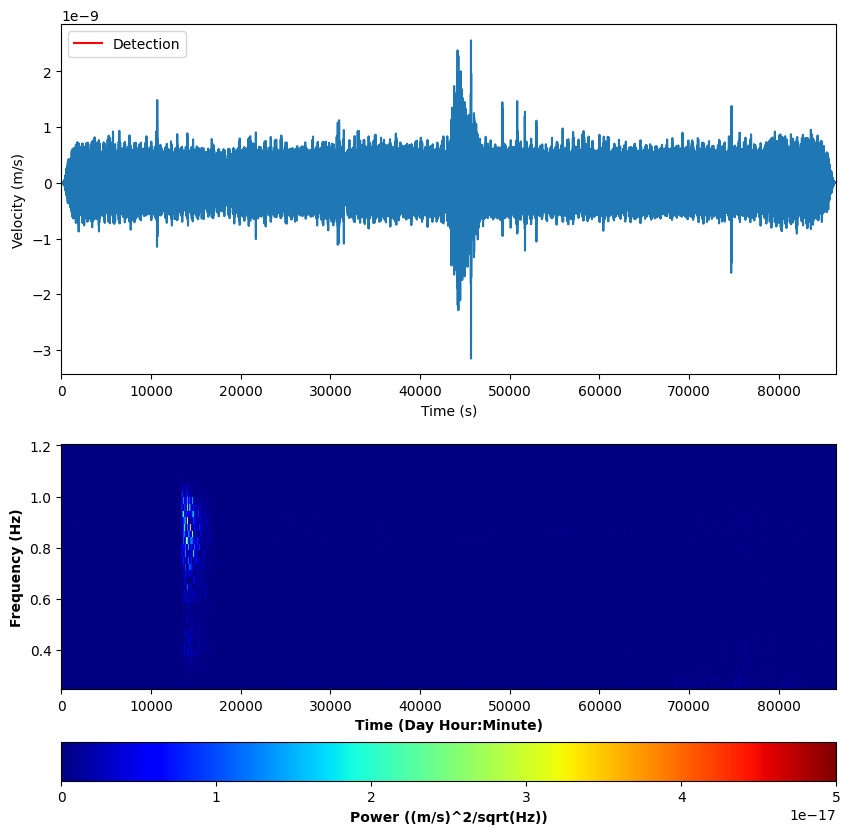

In [57]:
# Plot the time series and spectrogram

f, t, sxx = signal.spectrogram(tr_data, tr.stats.sampling_rate)
print(len(t))
freq_mask = (f >= 0.25) & (f <= 1.2)
f = f[freq_mask]
sxx = sxx[freq_mask, :]
# end_time = arrival + 6000
# time_mask = (t >= arrival) & (t <= end_time)
# t = t[time_mask]
# sxx = sxx[:, time_mask]

fig = plt.figure(figsize=(10, 10))
ax = plt.subplot(2, 1, 1)
# Plot trace
ax.plot(tr_times_filt,tr_data_filt)

# Mark detection
ax.axvline(x = arrival, color='red',label='Detection')
ax.legend(loc='upper left')

# Make the plot pretty
ax.set_xlim([min(tr_times_filt),max(tr_times_filt)])
ax.set_ylabel('Velocity (m/s)')
ax.set_xlabel('Time (s)')

ax2 = plt.subplot(2, 1, 2)
vals = ax2.pcolormesh(t, f, sxx, cmap=cm.jet, vmax=5e-17)
ax2.set_xlim([min(tr_times_filt),max(tr_times_filt)])
ax2.set_xlabel(f'Time (Day Hour:Minute)', fontweight='bold')
ax2.set_ylabel('Frequency (Hz)', fontweight='bold')
ax2.axvline(x=arrival, c='red')
cbar = plt.colorbar(vals, orientation='horizontal')
cbar.set_label('Power ((m/s)^2/sqrt(Hz))', fontweight='bold')

In [11]:
import numpy as np
import cv2
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight

# Load large image
def load_image(data_directory, image_path):
    # return cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    

    mseed_file = f'{data_directory}{image_path}.mseed'
    # mseed_file = "./data/lunar/test/data/S12_GradeB/xa.s12.00.mhz.1970-03-14HR00_evid00018.mseed"
    st = read(mseed_file)

    # This is how you get the data and the time, which is in seconds
    tr = st.traces[0].copy()
    tr_times = tr.times()
    tr_data = tr.data

    # Start time of trace (another way to get the relative arrival time using datetime)
    starttime = tr.stats.starttime.datetime
    # arrival = (arrival_time - starttime).total_seconds()

    f, t, sxx = signal.spectrogram(tr_data, tr.stats.sampling_rate)
    # print(len(t))
    freq_mask = (f >= 0.25) & (f <= 1.2)
    f = f[freq_mask]
    sxx = sxx[freq_mask, :]
    # end_time = arrival + 6000
    # time_mask = (t >= arrival) & (t <= end_time)
    # t = t[time_mask]
    # sxx = sxx[:, time_mask]

    return sxx, tr_times, t



# Sliding window function
def sliding_window(image, window_size, step_size):
    for x in range(0, image.shape[1] - window_size[1] + 1, step_size):
        # print(image.shape[0])
        yield x, image[:, x:x + window_size[1]]

def create_dataset(images, coordinates, window_size, step_size):
    samples, labels, positions = [], [], []
    positives = 0
    positive_samples = []  # Store positive sub-images
    for image, y_coord in zip(images, coordinates):
        for x, sub_image in sliding_window(image, window_size, step_size):
            if y_coord >= x and y_coord <= (x + window_size[1] * 0.8):
                label = 1  # Positive sample
                positives += 1
                positive_samples.append(sub_image)  # Add positive sub-image to the list
            else:
                label = 0  # Negative sample

            sub_image_resized = cv2.resize(sub_image, (window_size[1], window_size[0]))
            samples.append(sub_image_resized)
            labels.append(label)
            positions.append(x)  # Store the position of the sliding window

    print(f"Number of positive samples: {positives}")
    return np.array(samples), np.array(labels), positions, positive_samples

def plot_positive_samples(positive_samples):
    # Plot positive sub-images
    num_samples = len(positive_samples)
    plt.figure(figsize=(15, 5))

    # Display positive samples
    for i in range(num_samples):
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(positive_samples[i], cmap='gray')
        plt.axis('off')  # Turn off axis
        plt.title(f'Positive Sample {i + 1}')

    plt.tight_layout()
    plt.show()

# Define a simple CNN model
def build_model(input_shape):
    model = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=input_shape),  # Flatten input shape to 1D
        tf.keras.layers.Dense(200, activation='relu'),     # First dense layer
        tf.keras.layers.Dropout(0.5),                      # Dropout layer with 50% dropout rate
        tf.keras.layers.Dense(100, activation='relu'),     # Second dense layer
        tf.keras.layers.Dropout(0.5),                      # Dropout layer with 50% dropout rate
        tf.keras.layers.Dense(1, activation='sigmoid')     # Output layer for binary classification
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Train the CNN
def train_model(x_train, y_train, x_val, y_val, input_shape):
    class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
    class_weight_dict = {i: class_weights[i] for i in range(len(class_weights))}

    model = build_model(input_shape)
    model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=15, batch_size=16, class_weight=class_weight_dict)
    return model




Number of positive samples: 256


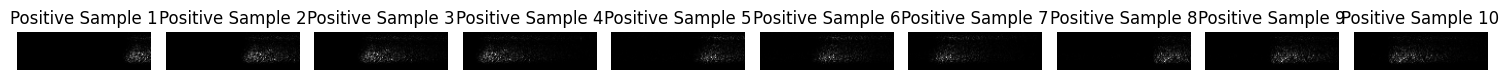

In [24]:
# Main script

cat_directory = './data/lunar/training/catalogs/'
cat_file = cat_directory + 'apollo12_catalog_GradeA_final.csv'
cat = pd.read_csv(cat_file)
cat

data_directory = './data/lunar/training/data/S12_GradeA/'

image_paths = cat["filename"]  # List of image paths
images = [load_image(data_directory, path)[0] for path in image_paths]
timestamps = [load_image(data_directory, path)[1] for path in image_paths]
t = [load_image(data_directory, path)[2] for path in image_paths]
y_coordinates = [np.argmax(image_timestamps > timestamp) for image_timestamps, timestamp in zip(t, cat["time_rel(sec)"])]  # Corresponding y-coordinates where the target starts for each image

window_size = (37, 130)  # (height, width)
step_size = 30

# Load images

# print(image_paths)
# Create dataset
samples, labels, postitions, positivvvs = create_dataset(images, y_coordinates, window_size, step_size)
# Bestimme den globalen Maximalwert für alle Samples
global_max = np.max(samples)

# Normalisiere die Samples (Wertebereich von 0 bis 1) durch den globalen Maximalwert
samples = samples / global_max



plot_positive_samples(positivvvs[:10])

# Expand dimensions to add channel information for CNN input
# samples = np.expand_dims(samples, axis=-1)



In [25]:
# Split dataset into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(samples, labels, test_size=0.2, random_state=42)

# Train model
input_shape = (window_size[0], window_size[1], 1)
model = train_model(x_train, y_train, x_val, y_val, input_shape)
# model = train_model(samples, labels, samples, labels, input_shape)

predictions = model.predict(samples)
print(predictions)


# Save model
model.save('cnn_detector.h5')

print("Training complete and model saved.")

Epoch 1/10


c:\Users\student\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


306/306 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8415 - loss: 0.6806 - val_accuracy: 0.9746 - val_loss: 0.6549
Epoch 2/10
306/306 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7971 - loss: 0.6253 - val_accuracy: 0.9730 - val_loss: 0.3363
Epoch 3/10
306/306 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9267 - loss: 0.4788 - val_accuracy: 0.9763 - val_loss: 0.3510
Epoch 4/10
306/306 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9132 - loss: 0.4074 - val_accuracy: 0.9755 - val_loss: 0.1857
Epoch 5/10
306/306 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9395 - loss: 0.3565 - val_accuracy: 0.9779 - val_loss: 0.2376
Epoch 6/10
306/306 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9452 - loss: 0.2767 - val_accuracy: 0.9755 - val_loss: 0.2125
Epoch 7/10
306/306 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9552 - loss: 0.2444 - val_accuracy: 0.9763 - val_loss: 0.1862
Epoch 8/10
306/306 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9754 - loss: 0.1807 - val_accuracy: 0.9771 - val_

[[0.1276342 ]
 [0.13806786]
 [0.17916302]
 ...
 [0.15350823]
 [0.13665843]
 [0.12819615]]
Training complete and model saved.


Number of positive samples: 1
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
[array([1.93207547e+01, 5.31320755e+01, 8.69433962e+01, ...,
       8.63058113e+04, 8.63396226e+04, 8.63734340e+04])]
270


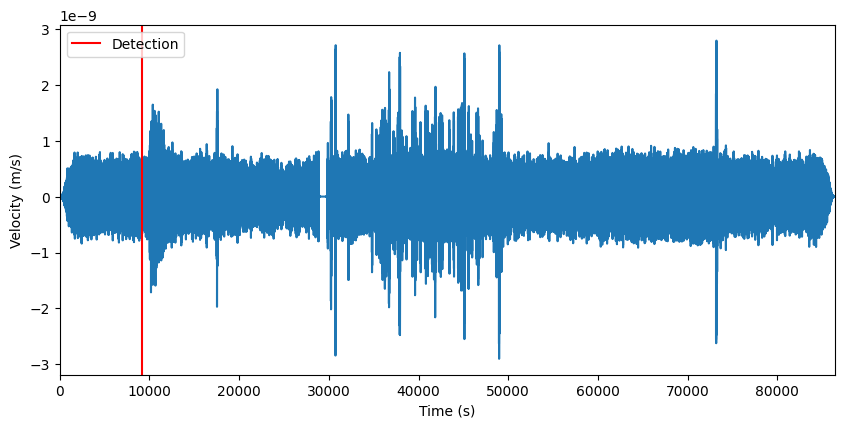

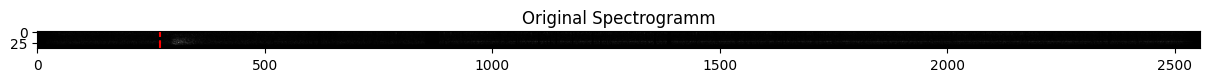

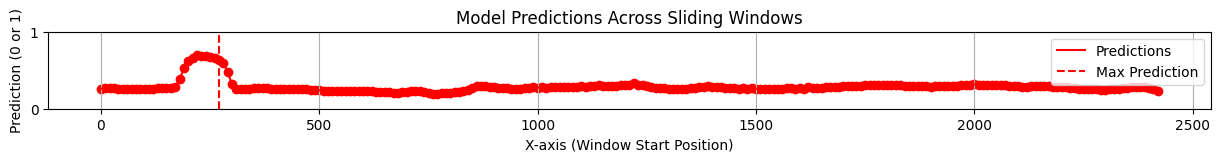

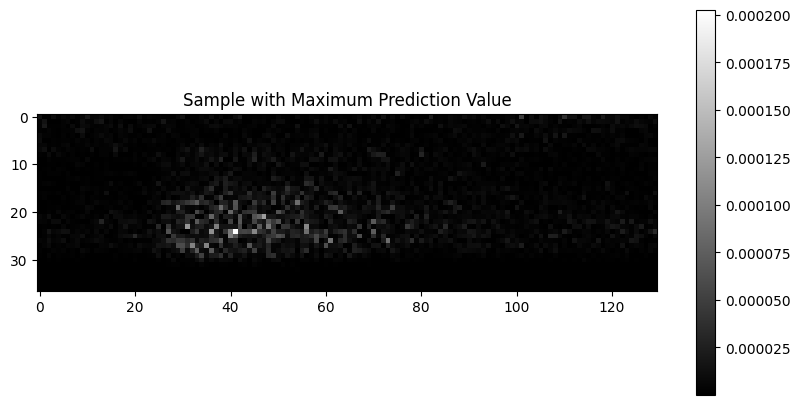

Number of positive samples: 1
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
[array([1.93207547e+01, 5.31320755e+01, 8.69433962e+01, ...,
       8.63058113e+04, 8.63396226e+04, 8.63734340e+04])]
2230


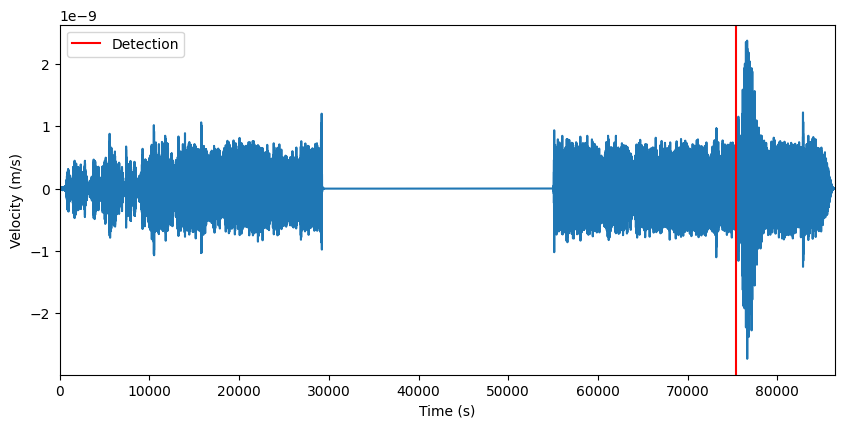

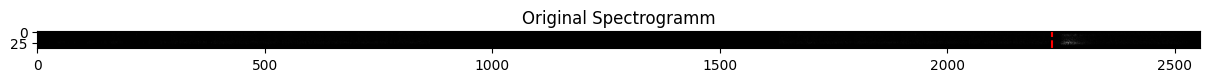

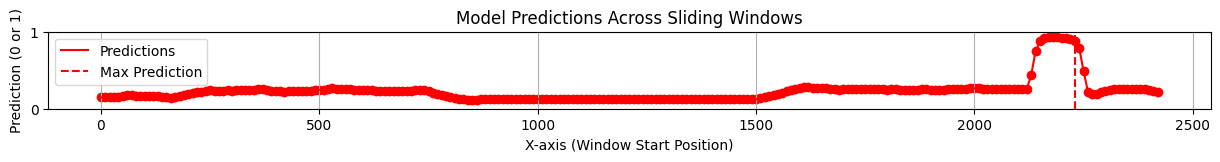

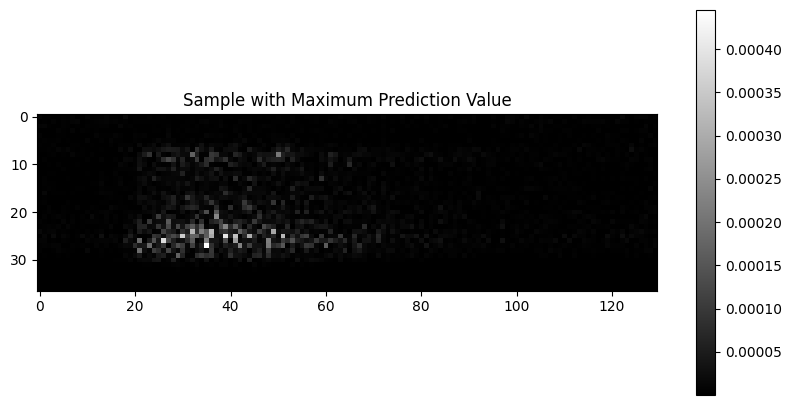

Number of positive samples: 1
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
[array([1.93207547e+01, 5.31320755e+01, 8.69433962e+01, ...,
       8.63058113e+04, 8.63396226e+04, 8.63734340e+04])]
2180


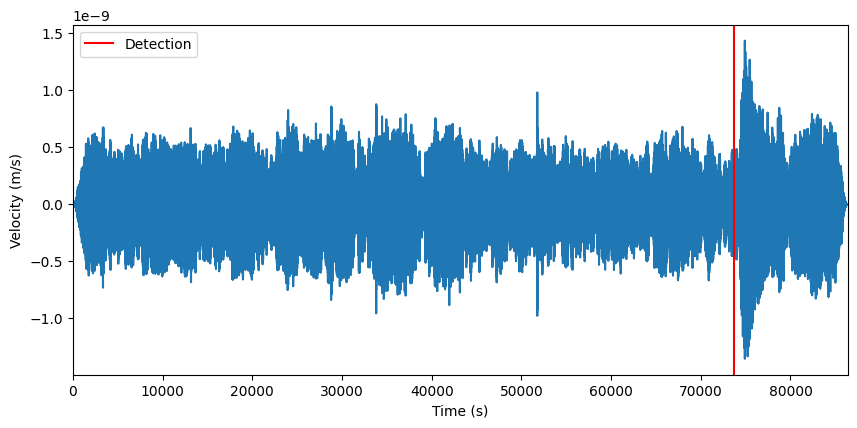

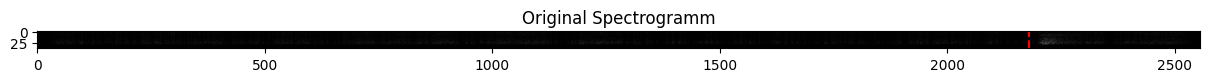

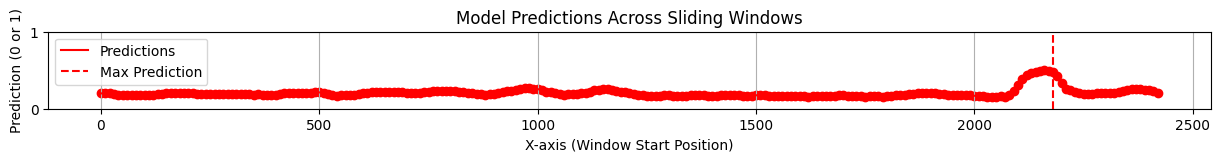

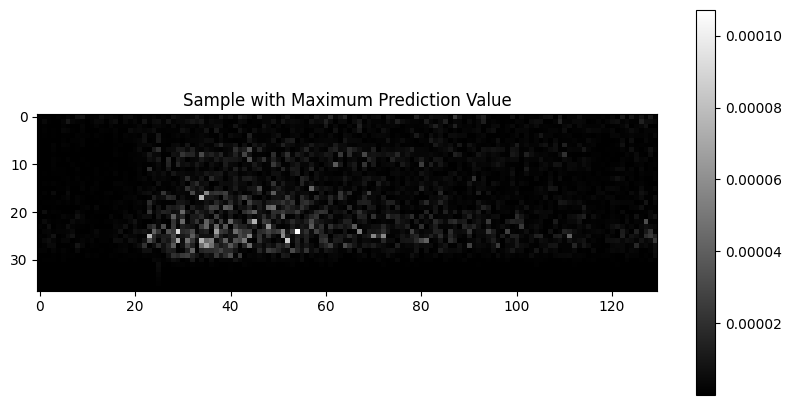

In [84]:
# test engegner script

# File name and start time of trace

# starttime = tr.stats.starttime.datetime

# Iterate through detection times and compile them
detection_times = []
fnames = []
triggers = []
# for i in np.arange(0,len(on_off)):
#     triggers = on_off[i]
#     on_time = starttime + timedelta(seconds = tr_times[triggers[0]])
#     on_time_str = datetime.strftime(on_time,'%Y-%m-%dT%H:%M:%S.%f')
#     detection_times.append(on_time_str)
#     fnames.append(fname)
    




directory = "./data/lunar/test/"
data_set = "S16_GradeB"
data_directory = f"{directory}data/{data_set}/"
cat_file = f"{directory}catalogs_ML/{data_set}.csv"


# path = "xa.s12.00.mhz.1970-02-18HR00_evid00016"
# data_directory = "./data/lunar/test/data/S12_GradeB/"

# path = "xa.s12.00.mhz.1970-03-14HR00_evid00018"
# data_directory = "./data/lunar/test/data/S12_GradeB/"

# path = "xa.s12.00.mhz.1970-02-07HR00_evid00014"
# data_directory = "./data/lunar/test/data/S12_GradeB/"

# path = "xa.s12.00.mhz.1970-01-19HR00_evid00002"
# data_directory = "./data/lunar/training/data/S12_GradeA/"
# mseed_file = "./data/lunar/test/data/S12_GradeB/xa.s12.00.mhz.1970-03-14HR00_evid00018.mseed"
# image_paths = cat["filename"]  # List of image paths

sampling_interval = np.mean(np.diff(tr.times()))  # Mean of the time differences
sampling_rate = 1 / sampling_interval

mseed_filenames = [
    os.path.splitext(filename)[0]  # Dateiname ohne Erweiterung
    for filename in os.listdir(data_directory)
    if filename.endswith('.mseed')  # Filter für .mseed Dateien
]

for path in mseed_filenames:

    fnames.append(path)

    images = [load_image(data_directory, path)[0]]

    # print(len(images), step_size)

    timestamps = [load_image(data_directory, path)[1]]
    t = [load_image(data_directory, path)[2]]
    y_coordinates = np.zeros(len(images))  # Corresponding y-coordinates where the target starts for each image

    window_size = (37, 130)  # (height, width)
    step_size = 10

    # Load images

    # print(image_paths)
    # Create dataset
    samples, labels, postitions, positivvvs = create_dataset(images, y_coordinates, window_size, step_size)
    # Bestimme den globalen Maximalwert für alle Samples
    # global_max = np.max(samples)

    # Normalisiere die Samples (Wertebereich von 0 bis 1) durch den globalen Maximalwert
    samples = samples / global_max



    # plot_positive_samples(positivvvs)

    model = tf.keras.models.load_model('cnn_detector.h5')

    # Expand dimensions to add channel information for CNN input
    # samples = np.expand_dims(samples, axis=-1)
    predictions = model.predict(samples)
    # print(predictions)
    max_prediction_value = np.max(predictions)

    # Finde die Indizes der Samples mit dem maximalen Vorhersagewert
    max_indices = np.where(predictions > max_prediction_value - 0.08)[0]

    # Wähle das letzte Sample mit dem maximalen Vorhersagewert
    last_max_index = max_indices[-1]

    triggers.append(t[0][postitions[last_max_index]])
    detection_times.append(0)

    mseed_file = f'{data_directory}{path}.mseed'
    # mseed_file = "./data/lunar/test/data/S12_GradeB/xa.s12.00.mhz.1970-03-14HR00_evid00018.mseed"
    st = read(mseed_file)

    # This is how you get the data and the time, which is in seconds
    tr = st.traces[0].copy()
    tr_times = tr.times()
    tr_data = tr.data



    if True:
        fig = plt.figure(figsize=(10, 10))
        ax = plt.subplot(2, 1, 1)
        # Plot trace
        ax.plot(tr_times,tr_data)

        # Mark detection
        print(t)
        print(postitions[last_max_index])
        ax.axvline(x = t[0][postitions[last_max_index]], color='red',label='Detection')
        ax.legend(loc='upper left')

        # Make the plot pretty
        ax.set_xlim([min(tr_times),max(tr_times)])
        ax.set_ylabel('Velocity (m/s)')
        ax.set_xlabel('Time (s)')
        plt.show()


        # Plot the original image and draw red lines at detected regions
        plt.figure(figsize=(15, 50))
        plt.imshow(images[0], cmap='gray')
        plt.title('Original Spectrogramm')



        plt.axvline(x=postitions[last_max_index], color='red', linestyle='--', label='Max Prediction')

        plt.figure(figsize=(15, 1))
        plt.plot(postitions, predictions, 'r-', label='Predictions')
        plt.scatter(postitions, predictions, color='red')  # Scatter plot for better visibility

        plt.axvline(x=postitions[last_max_index], color='red', linestyle='--', label='Max Prediction')


        plt.xlabel('X-axis (Window Start Position)')
        plt.ylabel('Prediction (0 or 1)')
        plt.title('Model Predictions Across Sliding Windows')
        plt.yticks([0, 1])
        plt.grid(True)
        plt.legend()
        plt.show()



        # Ändere die Größe des Samples auf die ursprüngliche Bildgröße
        resized_sample = cv2.resize(samples[last_max_index], (window_size[1], window_size[0]))

        # Plotte das Sample als 2D-Array
        plt.figure(figsize=(10, 5))
        plt.imshow(resized_sample, cmap='gray')
        plt.title('Sample with Maximum Prediction Value')
        plt.colorbar()
        plt.show()


# Compile dataframe of detections
detect_df = pd.DataFrame(data = {'filename':fnames, 'time_abs(%Y-%m-%dT%H:%M:%S.%f)':detection_times, 'time_rel(sec)':triggers})
# detect_df.head()
detect_df.to_csv(cat_file, index=False)

In [15]:
from sklearn.metrics import classification_report, confusion_matrix

model = tf.keras.models.load_model('cnn_detector.h5')

evaluation_image = images[0]
samples_eval, labels_eval, positions = create_dataset([evaluation_image], [y_coordinates[0]], window_size, step_size)
# Evaluate model
print(len(samples))
predictions = model.predict(evaluation_image)
print(predictions)
predictions = (predictions > 0.5).astype(int)  # Convert probabilities to binary labels

# Calculate metrics
print("Confusion Matrix:")
print(confusion_matrix(labels, predictions))
print("\nClassification Report:")
print(classification_report(labels, predictions))

# Optionally, evaluate on overall dataset accuracy
loss, accuracy = model.evaluate(samples, labels, verbose=0)
print("\nEvaluation Metrics:")
print(f"Loss: {loss:.4f}, Accuracy: {accuracy:.4f}")

Number of positive samples: 1


ValueError: too many values to unpack (expected 3)

In [20]:

evaluation_image = images[3]

samples_eval, labels_eval, positions, ppp = create_dataset([evaluation_image], [y_coordinates[0]], window_size, step_size)
# Bestimme den globalen Maximalwert für alle Samples
global_max = np.max(samples)

# Normalisiere die Samples (Wertebereich von 0 bis 1) durch den globalen Maximalwert
samples = samples / global_max

# plot_positive_samples(ppp)
# samples_eval = np.expand_dims(samples_eval, axis=-1)  # Add channel dimension

# Load model
model = tf.keras.models.load_model('cnn_detector.h5')

# Make predictions
predictions = model.predict([samples[243:324]])
print(predictions)
# predictions = (predictions > 0.5).astype(int)  # Convert probabilities to binary labels

# Plot the original image and draw red lines at detected regions
plt.figure(figsize=(15, 50))
plt.imshow(evaluation_image, cmap='gray')
plt.title('Detection Results')

plt.figure(figsize=(15, 1))
plt.plot(postitions, predictions, 'r-', label='Predictions')
plt.scatter(postitions, predictions, color='red')  # Scatter plot for better visibility
plt.xlabel('X-axis (Window Start Position)')
plt.ylabel('Prediction (0 or 1)')
plt.title('Model Predictions Across Sliding Windows')
plt.yticks([0, 1])
plt.grid(True)
plt.legend()
plt.show()

IndexError: list index out of range